# Data Preparation

The dataset has been cleaned according to our README.md, and is ready to be analysed. If the process of data cleaning is of any interest, the process is found in data_engineering.ipynb

In [1]:
import pandas as pd

from DataExploration import *
from DataExploration import descriptive_statistics as ds
from DataExploration import plots as pl
import ShowLinearRegression as slr
import ShowClassification as sc
import ShowClustering.clustering as scc

In [2]:
df = pd.read_csv("data/cleaned_sales_data.csv")

In [3]:
ds.describe_data(df, verbose=False, round_digits=2)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
datetime,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,8950,4.631285,1.648495,2.0,3.0,5.0,6.0,7.0
order_id,8950,14187.461341,6945.131456,913.0,7803.25,16092.5,20381.75,24712.0
order_total,8950,379.735592,281.788275,-623.0,238.0,323.0,456.0,5229.0
payment_method,8950,2.192514,0.801949,1.0,2.0,2.0,3.0,3.0
number_of_maindishes,8950,2.178492,2.190671,-5.0,1.0,2.0,2.0,43.0
number_of_snacks,8950,0.881341,1.356026,-4.0,0.0,0.0,1.0,16.0
number_of_drinks,8950,0.748939,2.548389,-3.0,0.0,0.0,1.0,53.0
number_of_soups,8950,0.101453,0.380829,0.0,0.0,0.0,0.0,5.0


Here we have a general simple overview of our dataset. By looking at the different columns we have decided that some of them are irrelevant in relation to our problem statement and hypotheses

In [4]:
df = df.drop(['datetime', 'order_id'], axis=1, inplace=False)

We have removed the columns 'datetime' and 'order_id' as they are not relevant for our data analysis.

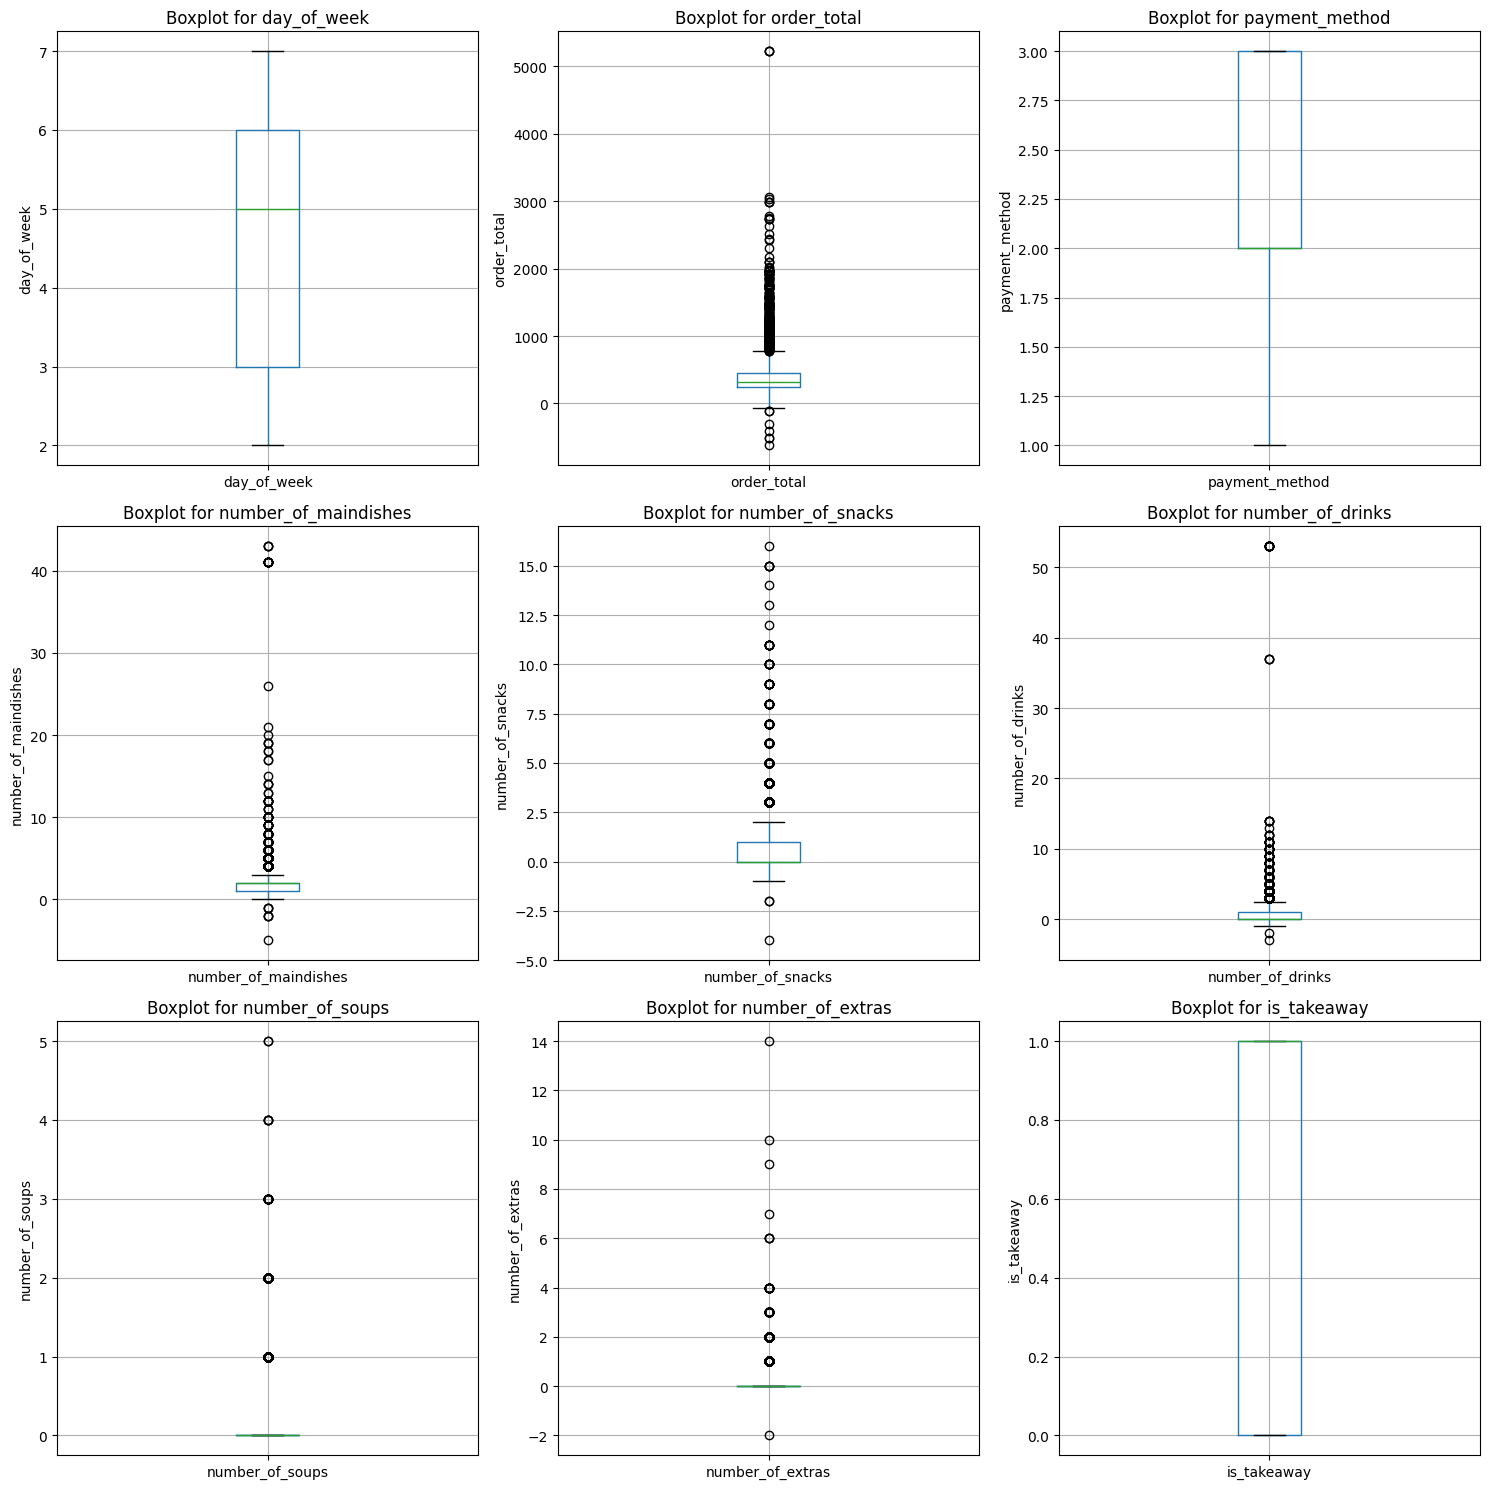

In [5]:
pl.show_boxplots(df, layout='grid')

We evalute that order_total is more/less normally distributed. In relation to day_of_week, payment_method, and is_takeaway, these are categorical variables. In relation to number_of_extras, number_of_soups, number_of_snacks etc. we do not have enough data to evaluate whether the distribution can be skewed or not. 

In [6]:
# Show all rows where any value is negative
df[df.lt(0).any(axis=1)]

,day_of_week,order_total,payment_method,number_of_maindishes,number_of_snacks,number_of_drinks,number_of_soups,number_of_extras,is_takeaway
171,6,-38.0,3,0.0,0.0,-1.0,0.0,0.0,0
708,7,-410.0,3,-2.0,-4.0,0.0,0.0,0.0,0
2359,5,-118.0,3,0.0,-1.0,-1.0,0.0,0.0,0
2415,6,-298.0,3,-2.0,0.0,0.0,0.0,0.0,0
2796,3,-39.0,3,-1.0,0.0,0.0,0.0,0.0,0
3423,6,-69.0,3,0.0,-1.0,0.0,0.0,0.0,0
3442,7,-69.0,3,0.0,-1.0,0.0,0.0,0.0,0
4842,6,-506.0,3,-2.0,-2.0,-2.0,0.0,-2.0,0
6671,7,-623.0,3,-5.0,-2.0,0.0,0.0,0.0,0
6759,3,-119.0,3,-1.0,0.0,0.0,0.0,0.0,0


We notice some negative values, which in the business context represents refunds. These values are not relevant for our analysis, so we discard those rows.

In [7]:
df = df.drop(df[df.lt(0).any(axis=1)].index)
df['is_takeaway'] = (df['is_takeaway'] > 0).astype(int)

We found outliers in terms of negative values in our data from our boxplots, and these have been removed from the dataset.
order_total, maindishes and snacks have some outliers, but these are confirmed from the restaurant as normal/valid orders, and thus included in the dataset for now.

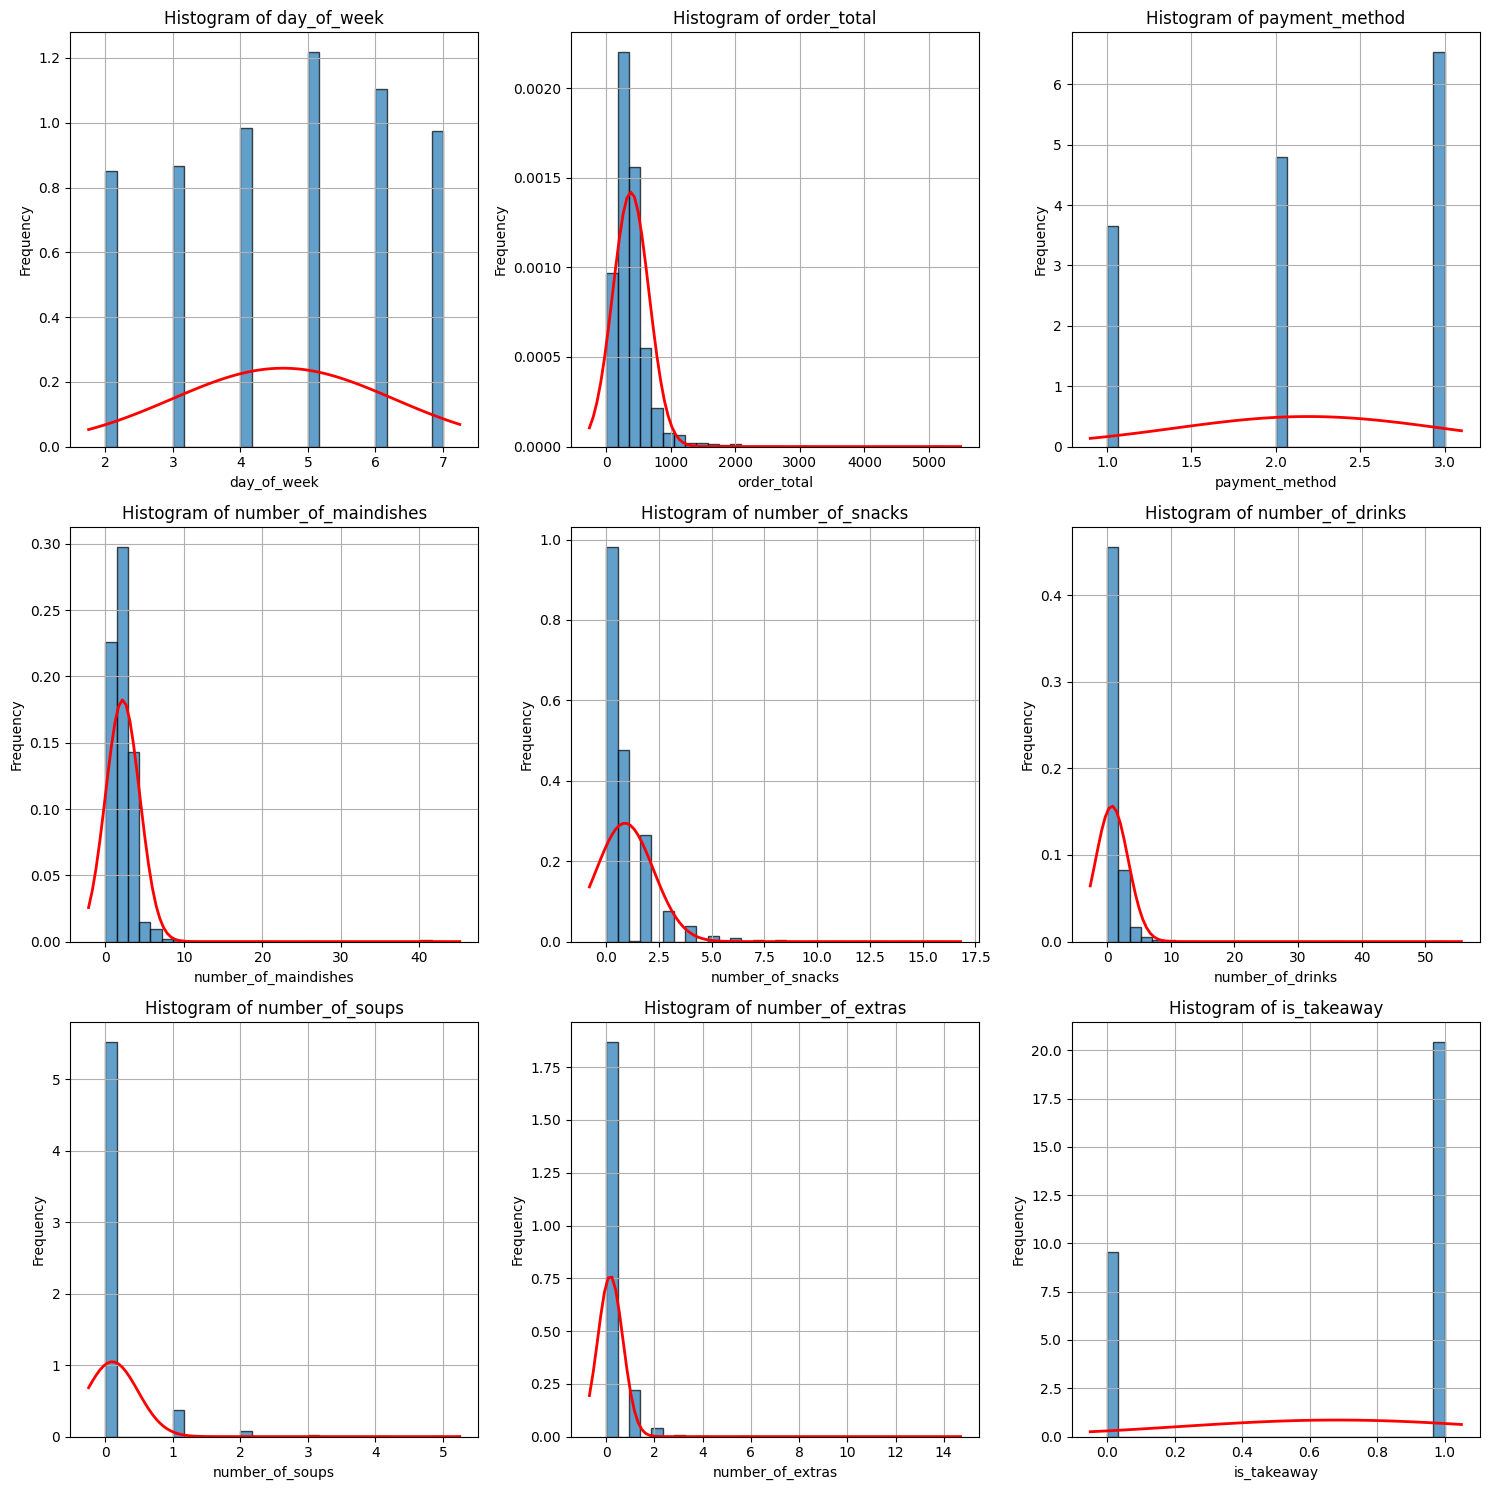

In [8]:
pl.show_histograms(df, layout='grid', bell_curve=True, bins=30)

Looking at the histograms we see close to normal distribution on the order_total plot.

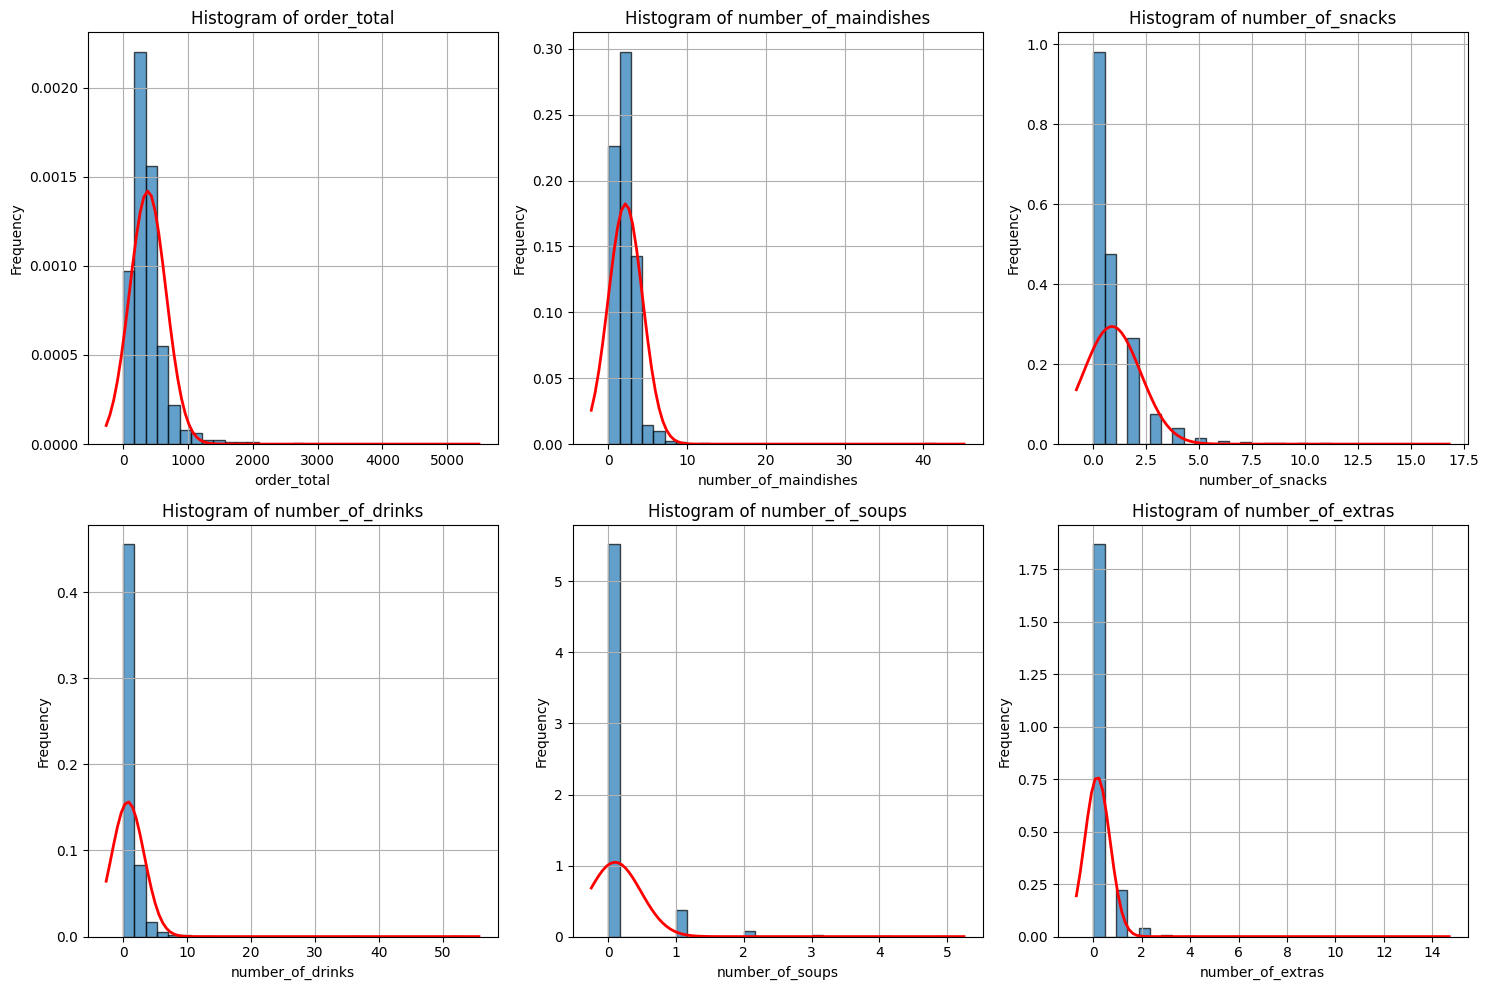

In [9]:
pl.show_histograms(df[['order_total', 'number_of_maindishes', 'number_of_snacks', 'number_of_drinks', 'number_of_soups', 'number_of_extras']], layout='grid', bell_curve=True, bins=30)

We have included all our relevant histograms above

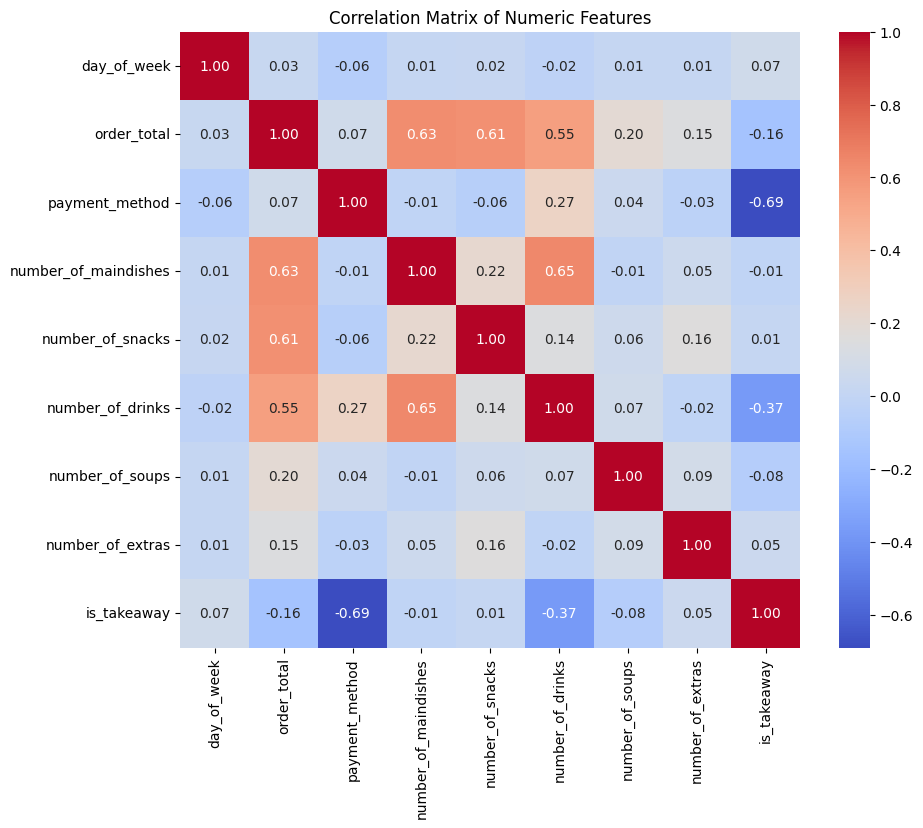

In [10]:
pl.show_correlation_heatmap(df)

From out correlation heatmap we can see correlation between snacks, drinks, maindishes when looking at order_total. While looking at payment_method we see a correlation with is_takeaway.
We would like to look further at number_of_drinks to see if we can make a model using linear regression to predict when people buy an extra beverage.
Our dependant variable is number of drinks, and independant values are number_of_maindishes and is_takeaway

In [11]:
slr.show_model(df, ['number_of_maindishes', 'is_takeaway'], ['number_of_drinks'], test_size=0.2, random_state=42)

The model is a hyperplane:
	y = 0.74*number_of_maindishes + -2.00*is_takeaway + 0.49
Mean Absolute Error  0.8453164074594943
Mean Squared Error  2.5903381191777286
Root Mean Squared Error  1.6094527390320377
Explained variance score  0.55
R2 score  0.5521642774059576


([array([ 0.74095362, -1.99569667])],
 array([0.48730872]),
 0.8453164074594943,
 2.5903381191777286,
 np.float64(1.6094527390320377),
 0.55,
 0.5521642774059576,
 LinearRegression())

Looking at the multiple linear regression model, we see a variance score of 0.55 or 55% which we conclude not to be the best model.

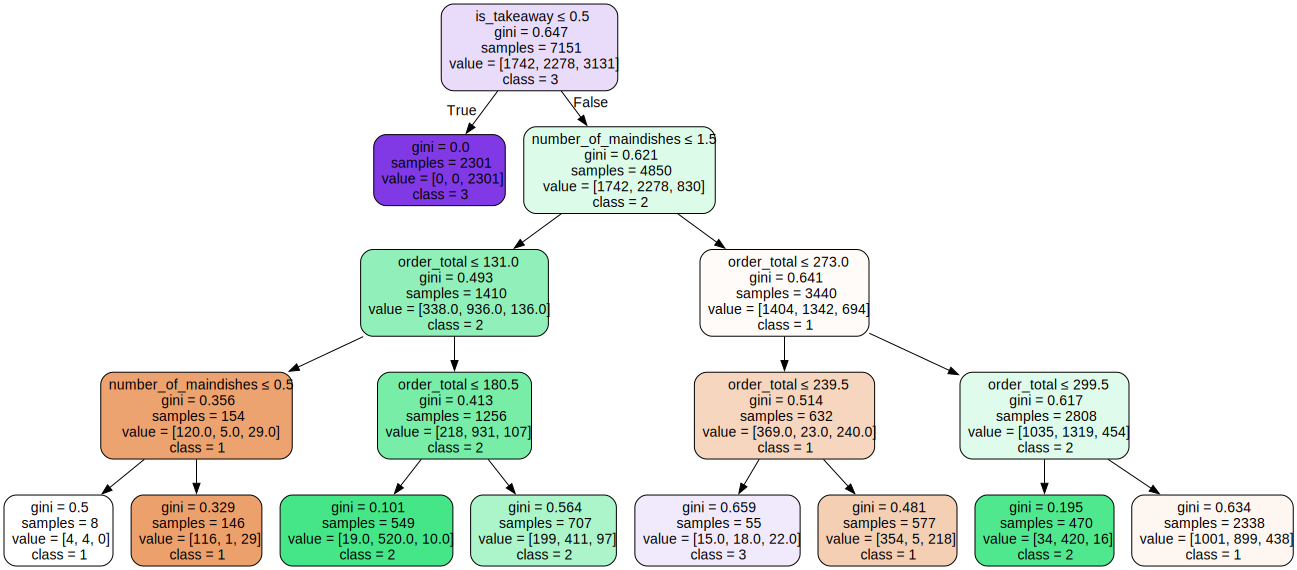

Accuracy: 0.7125279642058165
Confusion Matrix:
 [[372  66   2]
 [242 341   2]
 [168  34 561]]


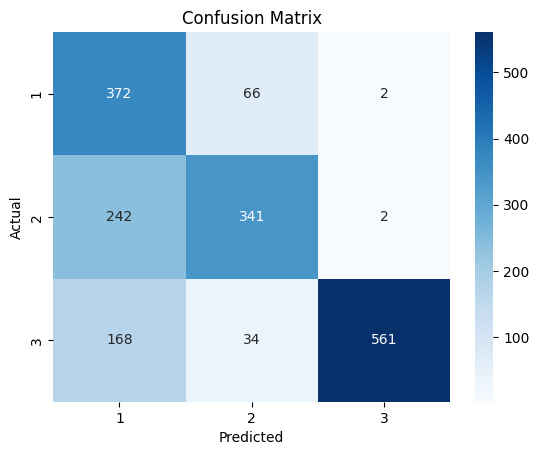

(DecisionTreeClassifier(max_depth=4, random_state=42),
 0.7125279642058165,
 array([[372,  66,   2],
        [242, 341,   2],
        [168,  34, 561]]))

In [12]:
sc.show_decision_tree(df, 'payment_method', max_depth=4)

Vi kan se på confusion matrix at modellen har svært ved at adskille Mealo og Inhouse fra hinanden, mens der er færre falske positiver for Wolt.

## Clustering

This section groups individual orders into natural behavioral segments. No labels were provided to the model; it discovered patterns on its own.

As you will see, we have applied log1p as it compress larger values, so very big orders don't dominate distances in clustering.

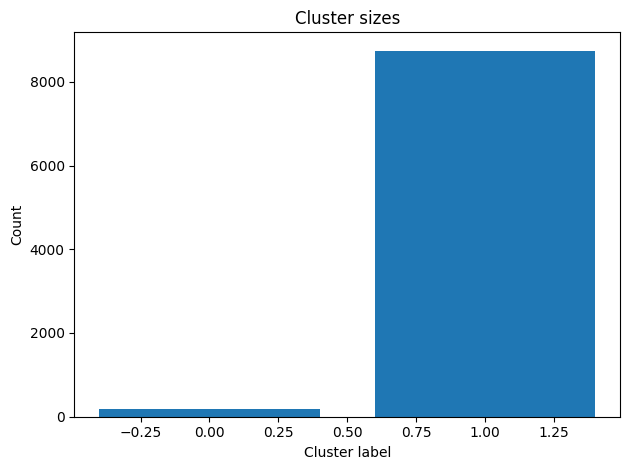

In [16]:
res, X = scc.show_cluster_sizes(df)

What we see here, is a count of orders in each cluster. the height of each bar is the number of orders assigned to that segment. We have 1 larger segment, and 1 small segment. This tells us that demands is highly concentrated in a single behavior pattern, with one distinct but low volume alternative.

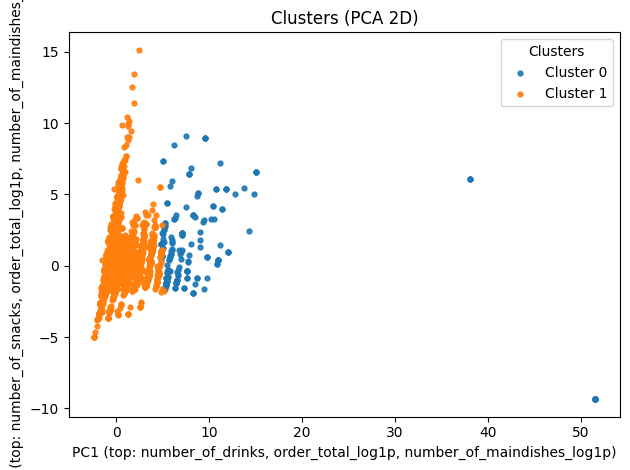

In [14]:
res, X = scc.show_pca_scatter_2d(df)

Here each dot is an order, wich is colored by the respective cluster. Using principal components, we project all features into two axes, *PC1* and *PC2*.

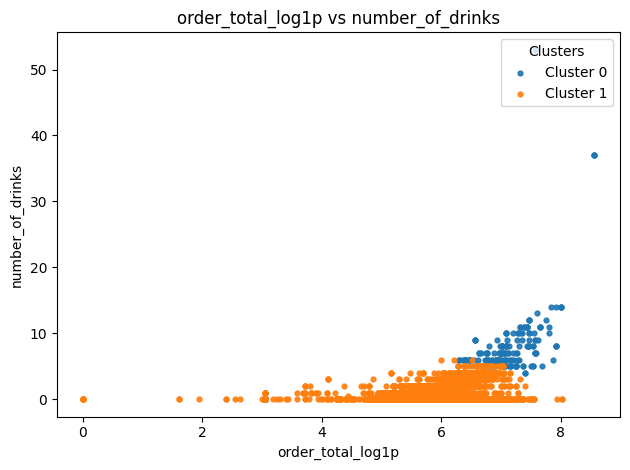

In [15]:
res, X = scc.show_feature_scatter_2d(df,'order_total_log1p','number_of_drinks',)

this shows the direct relationship between spend(x-axis) and drinks(y-axis). <br>the x-axis uses the log1p =  ```
ln(1 + order_total)```
. <br>Dots further right are highspend orders. Dots higher up have more drinks. 

log1p scale:
- x = 6 ≈ 403,- (```exp(6)-1```)
- x = 7 ≈ 1097,-
- x = 8 ≈ 2981,-

what we see:<br>Orange cluster: many orders with 0-3 drinks and moderate spend - everyday, smaller basket.<br>Blue cluster: clearly drink heavy and high spend - party or event behavior.